In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# nicer plots
plt.style.use("seaborn-v0_8")


In [3]:
# Loading the two sheets into separate DataFrames
## Loading GBP/USD and GBP/EUR sheets, renaming columns, converting dates

file_path = r"C:\Users\ADMIN\Desktop\BOE_DATA.xlsx"   

gbp_usd = pd.read_excel(file_path, sheet_name="gbpusd", skiprows=2)  # to skip first 2 rows
gbp_eur = pd.read_excel(file_path, sheet_name="gbpeur", skiprows=2)

# Rename columns for consistency
gbp_usd.columns = ["Date", "Rate", "Log_Return"]
gbp_eur.columns = ["Date", "Rate", "Log_Return"]

gbp_usd["Date"] = pd.to_datetime(gbp_usd["Date"], format="%d %b %y")
gbp_eur["Date"] = pd.to_datetime(gbp_eur["Date"], format="%d %b %y")

# Ensure Date column is datetime
gbp_usd["Date"] = pd.to_datetime(gbp_usd["Date"])
gbp_eur["Date"] = pd.to_datetime(gbp_eur["Date"])

print(gbp_usd.head())
print(gbp_eur.head())


        Date    Rate  Log_Return
0 2025-01-03  1.2404    0.002341
1 2025-01-06  1.2508    0.008349
2 2025-01-07  1.2498   -0.000800
3 2025-01-08  1.2342   -0.012561
4 2025-01-09  1.2303   -0.003165
        Date    Rate  Log_Return
0 2025-01-03  1.2058    0.001079
1 2025-01-06  1.2034   -0.001992
2 2025-01-07  1.2049    0.001246
3 2025-01-08  1.1982   -0.005576
4 2025-01-09  1.1945   -0.003093


In [4]:
# Descriptive stats for GBP/USD
print("Descriptive statistics for GBP/USD")
print(gbp_usd["Log_Return"].describe())

# Descriptive stats for GBP/EUR
print("\nDescriptive statistics for GBP/EUR")
print(gbp_eur["Log_Return"].describe())


Descriptive statistics for GBP/USD
count    146.000000
mean       0.000459
std        0.005072
min       -0.017466
25%       -0.002120
50%        0.000159
75%        0.003230
max        0.015788
Name: Log_Return, dtype: float64

Descriptive statistics for GBP/EUR
count    146.000000
mean      -0.000281
std        0.003318
min       -0.011616
25%       -0.002389
50%       -0.000168
75%        0.001862
max        0.007728
Name: Log_Return, dtype: float64


In [5]:
desc_stats = pd.DataFrame({
    "GBP/USD": gbp_usd["Log_Return"].describe(),
    "GBP/EUR": gbp_eur["Log_Return"].describe()
})
print(desc_stats)


          GBP/USD     GBP/EUR
count  146.000000  146.000000
mean     0.000459   -0.000281
std      0.005072    0.003318
min     -0.017466   -0.011616
25%     -0.002120   -0.002389
50%      0.000159   -0.000168
75%      0.003230    0.001862
max      0.015788    0.007728


In [6]:
# Merge both datasets on Date
merged = pd.merge(gbp_usd[["Date", "Log_Return"]], 
                  gbp_eur[["Date", "Log_Return"]], 
                  on="Date", 
                  suffixes=("_USD", "_EUR"))

# Correlation
corr = merged[["Log_Return_USD", "Log_Return_EUR"]].corr()
print(corr)


                Log_Return_USD  Log_Return_EUR
Log_Return_USD         1.00000         0.11849
Log_Return_EUR         0.11849         1.00000


In [7]:
from statsmodels.tsa.stattools import adfuller

# ADF test function
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")
    if result[1] < 0.05:
        print(f"Conclusion: {name} is stationary \n")
    else:
        print(f"Conclusion: {name} is NOT stationary \n")

# Run tests
adf_test(gbp_usd["Log_Return"], "GBP/USD")
adf_test(gbp_eur["Log_Return"], "GBP/EUR")


ADF Test for GBP/USD:
ADF Statistic: -11.2968
p-value: 0.0000
Critical Value (1%): -3.4763
Critical Value (5%): -2.8817
Critical Value (10%): -2.5775
Conclusion: GBP/USD is stationary 

ADF Test for GBP/EUR:
ADF Statistic: -3.8248
p-value: 0.0027
Critical Value (1%): -3.4805
Critical Value (5%): -2.8835
Critical Value (10%): -2.5785
Conclusion: GBP/EUR is stationary 



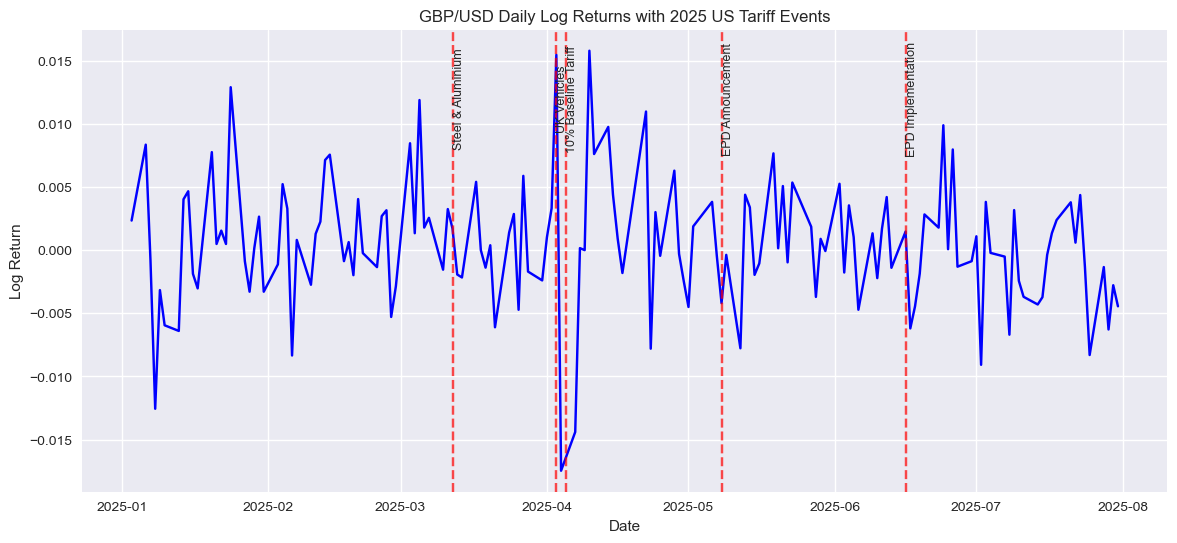

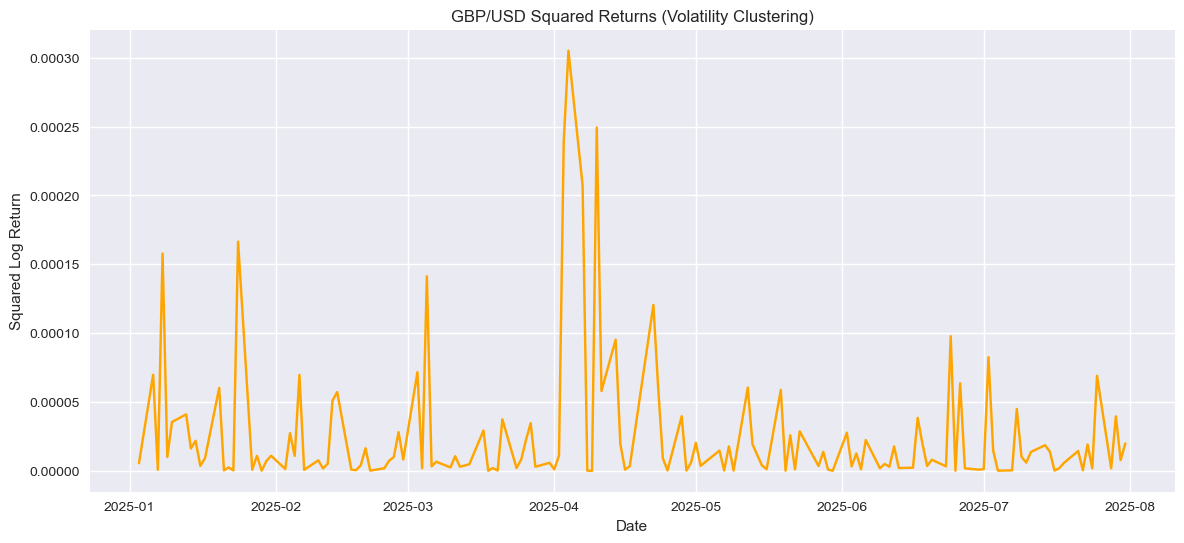

In [8]:
# List of tariff events
events = {
    "Steel & Aluminium": "2025-03-12",
    "UK Vehicles": "2025-04-03",
    "10% Baseline Tariff": "2025-04-05",
    "EPD Announcement": "2025-05-08",
    "EPD Implementation": "2025-06-16"
}

# Convert event dates to datetime
event_dates = {k: pd.to_datetime(v) for k, v in events.items()}

# Plot daily returns
plt.figure(figsize=(14,6))
plt.plot(gbp_usd["Date"], gbp_usd["Log_Return"], label="GBP/USD Log Return", color="blue")
for event, date in event_dates.items():
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)
    plt.text(date, 0.012, event, rotation=90, verticalalignment='center', fontsize=9)
plt.title("GBP/USD Daily Log Returns with 2025 US Tariff Events")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

# Plot squared returns
plt.figure(figsize=(14,6))
plt.plot(gbp_usd["Date"], gbp_usd["Log_Return"]**2, color="orange")
plt.title("GBP/USD Squared Returns (Volatility Clustering)")
plt.xlabel("Date")
plt.ylabel("Squared Log Return")
plt.grid(True)
plt.show()


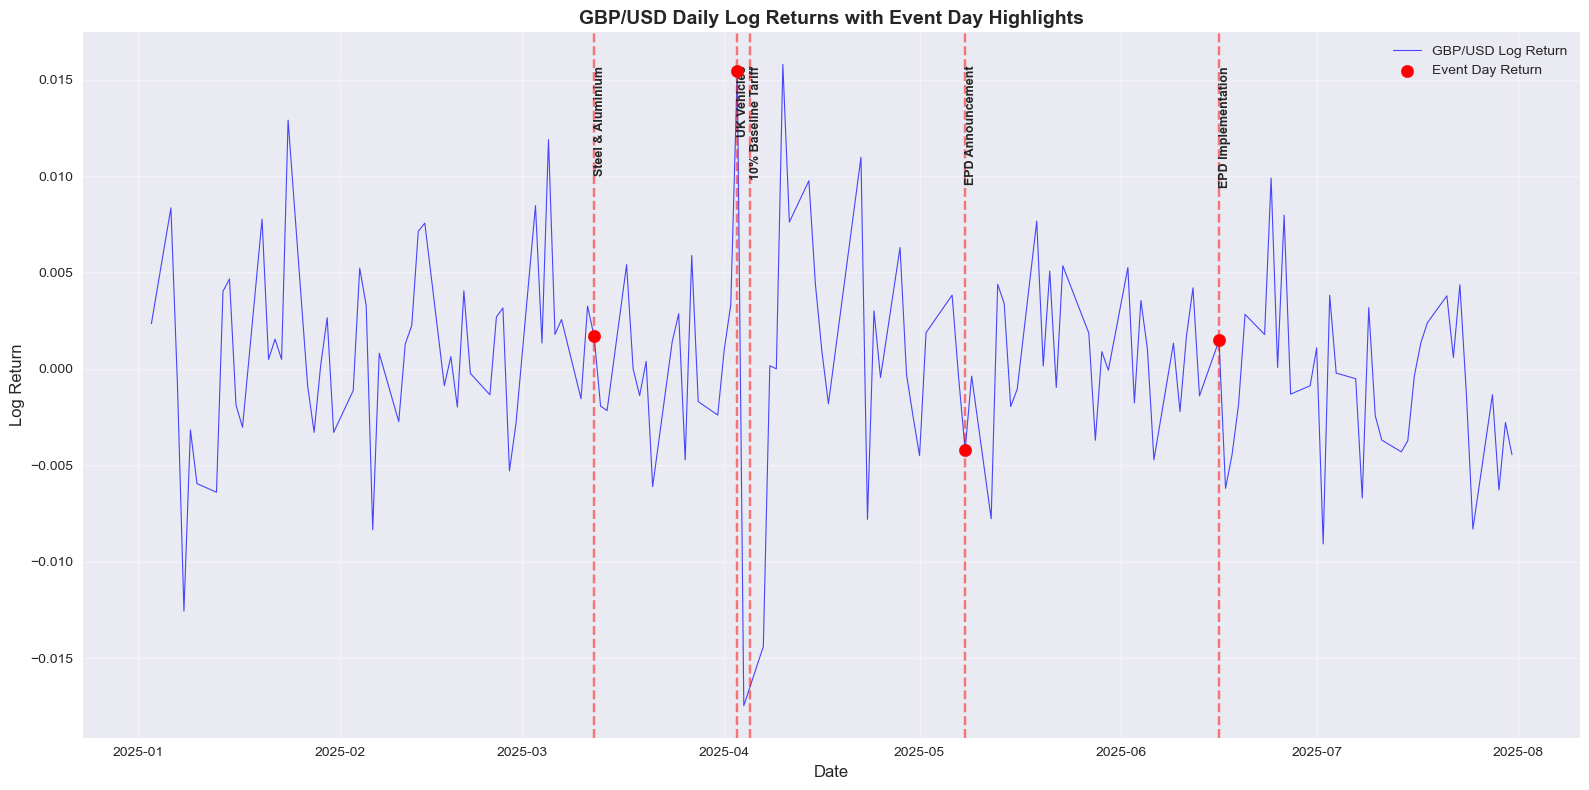

In [9]:
# List of tariff events
events = {
    "Steel & Aluminium": "2025-03-12",
    "UK Vehicles": "2025-04-03",
    "10% Baseline Tariff": "2025-04-05",
    "EPD Announcement": "2025-05-08",
    "EPD Implementation": "2025-06-16"
}

# Convert event dates to datetime
event_dates = {k: pd.to_datetime(v) for k, v in events.items()}

# Create a new column to mark event day returns
gbp_usd['Is_Event_Day'] = gbp_usd['Date'].isin(event_dates.values())
event_day_returns = gbp_usd[gbp_usd['Is_Event_Day']]

# Plot daily returns
plt.figure(figsize=(16, 8))
plt.plot(gbp_usd["Date"], gbp_usd["Log_Return"], label="GBP/USD Log Return", color="blue", linewidth=0.8, alpha=0.7)

# Highlight the specific return on the event day with a large dot
plt.scatter(event_day_returns['Date'], event_day_returns['Log_Return'], 
            color='red', s=80, zorder=5, label='Event Day Return')

# Add vertical lines and labels for each event
for event, date in event_dates.items():
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)
    plt.text(date, plt.ylim()[1]*0.9, event, rotation=90, 
             verticalalignment='top', fontsize=9, fontweight='bold')

plt.title("GBP/USD Daily Log Returns with Event Day Highlights", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log Return", fontsize=12)
plt.grid(True, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Function to calculate mean & std for event window
def event_window_stats(df, event_name, event_date, window):
    event_date = pd.to_datetime(event_date)
    start_date = event_date - pd.Timedelta(days=window)
    end_date = event_date + pd.Timedelta(days=window)
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    event_returns = df.loc[mask, 'Log_Return']
    mean = event_returns.mean()
    std = event_returns.std()
    print(f"{event_name} ({event_date.date()}) | Window ±{window} days | Mean: {mean:.6f} | Std: {std:.6f}")
    return event_returns

# Run for all events
event_stats = {}
event_stats['Steel & Aluminium'] = event_window_stats(gbp_usd, "Steel & Aluminium", "2025-03-12", 2)
event_stats['UK Vehicles'] = event_window_stats(gbp_usd, "UK Vehicles", "2025-04-03", 2)
event_stats['10% Baseline Tariff'] = event_window_stats(gbp_usd, "10% Baseline Tariff", "2025-04-05", 2)
event_stats['EPD Announcement'] = event_window_stats(gbp_usd, "EPD Announcement", "2025-05-08", 1)
event_stats['EPD Implementation'] = event_window_stats(gbp_usd, "EPD Implementation", "2025-06-16", 1)


Steel & Aluminium (2025-03-12) | Window ±2 days | Mean: -0.000139 | Std: 0.002458
UK Vehicles (2025-04-03) | Window ±2 days | Mean: 0.000580 | Std: 0.013599
10% Baseline Tariff (2025-04-05) | Window ±2 days | Mean: -0.005469 | Std: 0.018189
EPD Announcement (2025-05-08) | Window ±1 days | Mean: -0.001674 | Std: 0.002186
EPD Implementation (2025-06-16) | Window ±1 days | Mean: -0.002363 | Std: 0.005423


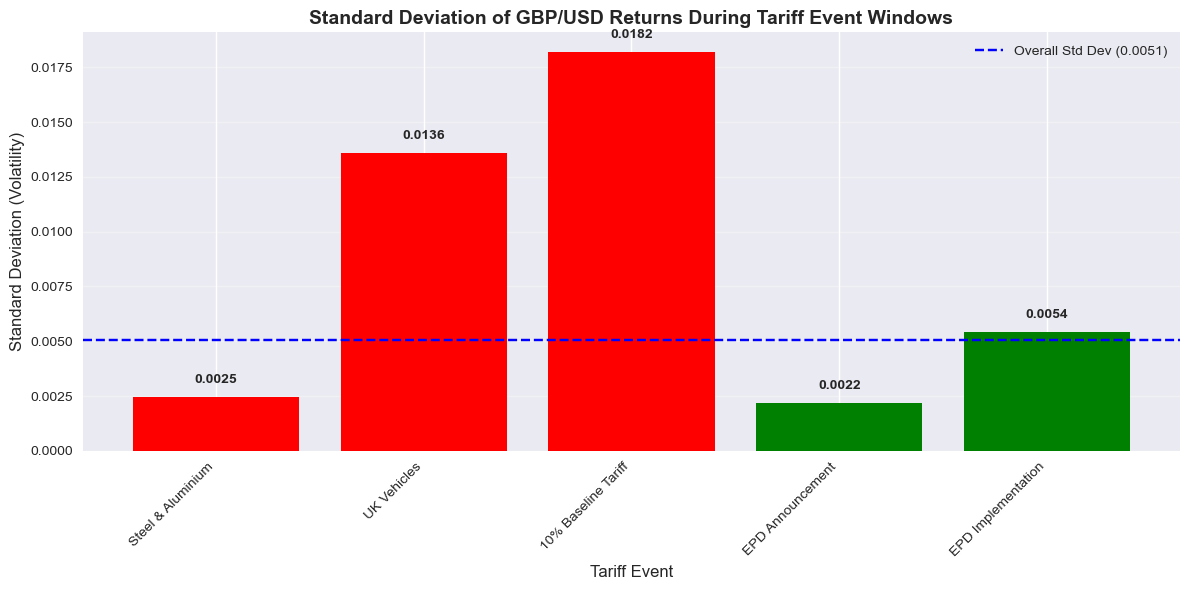

In [11]:

# Create a list of event names and their standard deviations for plotting
events_for_plot = list(event_stats.keys())
std_devs = [returns.std() for returns in event_stats.values()]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(events_for_plot, std_devs, color=['red', 'red', 'red', 'green', 'green']) # Color bad/good news

# Add a horizontal line for the overall standard deviation for reference
overall_std = gbp_usd['Log_Return'].std()
plt.axhline(y=overall_std, color='blue', linestyle='--', label=f'Overall Std Dev ({overall_std:.4f})')

# Customize the plot
plt.title('Standard Deviation of GBP/USD Returns During Tariff Event Windows', fontsize=14, fontweight='bold')
plt.ylabel('Standard Deviation (Volatility)', fontsize=12)
plt.xlabel('Tariff Event', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

# Add the value labels on top of each bar
for i, v in enumerate(std_devs):
    plt.text(i, v + 0.0005, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout() # Ensures everything fits in the figure
plt.show()

In [12]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [13]:
from arch import arch_model

In [14]:
#new single DataFrame summarizing all event statistics (mean, std, window, type) for easier reporting and plotting:
event_summary = pd.DataFrame({
    'Event': list(event_stats.keys()),
    'Mean': [returns.mean() for returns in event_stats.values()],
    'Std': [returns.std() for returns in event_stats.values()],
    'Type': ['Bad','Bad','Bad','Good','Good']
})
print(event_summary)


                 Event      Mean       Std  Type
0    Steel & Aluminium -0.000139  0.002458   Bad
1          UK Vehicles  0.000580  0.013599   Bad
2  10% Baseline Tariff -0.005469  0.018189   Bad
3     EPD Announcement -0.001674  0.002186  Good
4   EPD Implementation -0.002363  0.005423  Good


In [15]:
from arch import arch_model

# Use only the log returns for GARCH
returns = gbp_usd['Log_Return'] * 100  # scale to percent for stability

# Fit baseline GARCH(1,1) model
garch_baseline = arch_model(returns, vol='Garch', p=1, q=1, mean='Zero', dist='normal')
res_baseline = garch_baseline.fit(update_freq=5, disp='off')
print(res_baseline.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:               -103.639
Distribution:                  Normal   AIC:                           213.277
Method:            Maximum Likelihood   BIC:                           222.228
                                        No. Observations:                  146
Date:                Tue, Sep 02 2025   Df Residuals:                      146
Time:                        18:33:52   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0431  2.548e-02      1.692  9.069e-02 

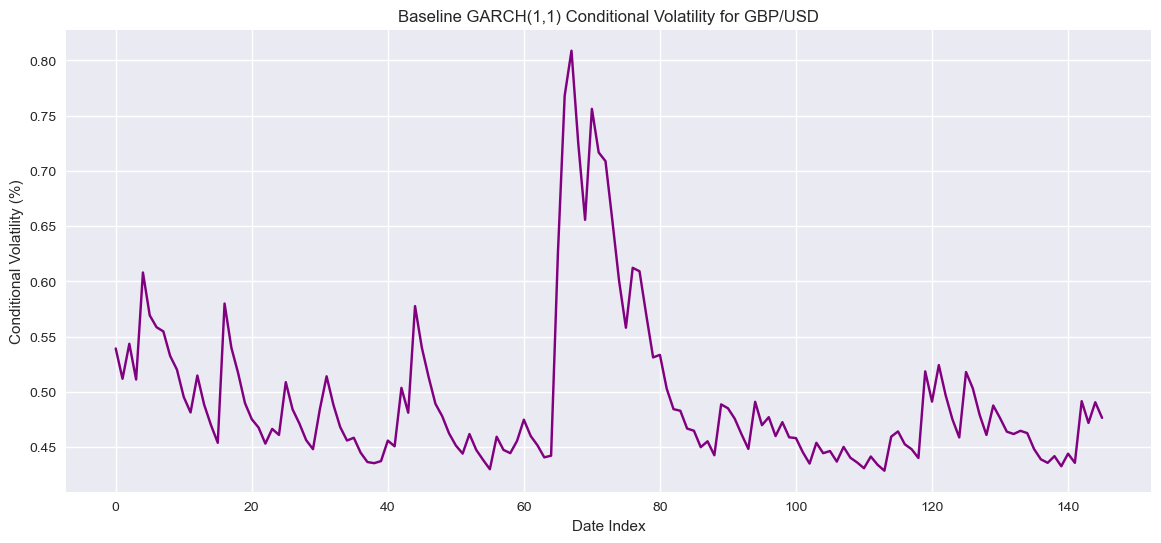

In [16]:
# Conditional variance plot
plt.figure(figsize=(14,6))
plt.plot(res_baseline.conditional_volatility, color='purple')
plt.title('Baseline GARCH(1,1) Conditional Volatility for GBP/USD')
plt.xlabel('Date Index')
plt.ylabel('Conditional Volatility (%)')
plt.grid(True)
plt.show()


In [43]:
# --- CREATE TRADING-DAY EVENT DUMMIES  ---

def create_trading_window_dummy(date_series, central_date, window):
    """
    Creates a dummy variable that is 1 for ±window TRADING DAYS around a central date.
    If the central date is not a trading day, it uses the next trading day.

    Parameters:
    date_series (pd.Series): The 'Date' column of your DataFrame.
    central_date (str): The date of the event ('YYYY-MM-DD').
    window (int): Number of trading days before and after the event.

    Returns:
    pd.Series: A dummy variable with 1s in the event window.
    """
    # Convert the event date to datetime
    event_date = pd.to_datetime(central_date)
    
    # Find the INDEX POSITION of the event date OR THE NEXT TRADING DAY
    # This is the fix for the error
    try:
        # Try to find the exact date
        event_index = date_series[date_series == event_date].index[0]
    except IndexError:
        # If the exact date isn't found (because it's a holiday/weekend),
        # find the next trading day after the event
        next_trading_day = date_series[date_series > event_date].min()
        event_index = date_series[date_series == next_trading_day].index[0]
        print(f"Note: Event date {central_date} was not a trading day. Using next trading day: {next_trading_day.date()}")

    # Define the start and end index of the window
    start_index = max(date_series.index[0], event_index - window)
    end_index = min(date_series.index[-1], event_index + window)

    # Create a series of zeros
    dummy = pd.Series(0, index=date_series.index)
    # Set the event window to 1
    dummy.loc[start_index:end_index] = 1

    return dummy

# Define your events and their windows according to your plan
events_to_create = {
    'Steel_Al': ('2025-03-12', 2),  # Event 1: ±2 days
    'UK_Vehicles': ('2025-04-03', 2), # Event 2: ±2 days
    'Baseline10': ('2025-04-05', 2),  # Event 3: ±2 days (This one will trigger the fix!)
    'EPD_Ann': ('2025-05-08', 1),     # Event 4: ±1 day
    'EPD_Impl': ('2025-06-16', 1)     # Event 5: ±1 day
}

print("Creating event dummies. Checking for non-trading event dates...")
# Create and add the dummy variables to your DataFrame
for dummy_name, (event_date, window) in events_to_create.items():
    gbp_usd[dummy_name] = create_trading_window_dummy(gbp_usd['Date'], event_date, window)
    # Also create them for GBP/EUR for the robustness check later!
    gbp_eur[dummy_name] = create_trading_window_dummy(gbp_eur['Date'], event_date, window)

# Create BoE and FOMC dummies (These are single-day events, so no window)
boe_dates = ['2025-05-08', '2025-06-19']
fomc_dates = ['2025-05-06', '2025-05-07', '2025-06-17', '2025-06-18']

gbp_usd['BoE'] = gbp_usd['Date'].isin([pd.to_datetime(d) for d in boe_dates]).astype(int)
gbp_usd['FOMC'] = gbp_usd['Date'].isin([pd.to_datetime(d) for d in fomc_dates]).astype(int)
gbp_eur['BoE'] = gbp_eur['Date'].isin([pd.to_datetime(d) for d in boe_dates]).astype(int)
gbp_eur['FOMC'] = gbp_eur['Date'].isin([pd.to_datetime(d) for d in fomc_dates]).astype(int)

# --- VERIFICATION: Check that the dummies are correct ---
print("\nVerification for Event 3 ('10% Baseline Tariff' on 2025-04-05, ±2 days):")
# This will now show the window around the NEXT TRADING DAY (e.g., April 7th)
print(gbp_usd[gbp_usd['Baseline10'] == 1][['Date', 'Baseline10']])
print("\nVerification for Event 5 ('EPD Implementation' on 2025-06-16, ±1 day):")
print(gbp_usd[gbp_usd['EPD_Impl'] == 1][['Date', 'EPD_Impl']])

Creating event dummies. Checking for non-trading event dates...
Note: Event date 2025-04-05 was not a trading day. Using next trading day: 2025-04-07
Note: Event date 2025-04-05 was not a trading day. Using next trading day: 2025-04-07

Verification for Event 3 ('10% Baseline Tariff' on 2025-04-05, ±2 days):
         Date  Baseline10
64 2025-04-03           1
65 2025-04-04           1
66 2025-04-07           1
67 2025-04-08           1
68 2025-04-09           1

Verification for Event 5 ('EPD Implementation' on 2025-06-16, ±1 day):
          Date  EPD_Impl
111 2025-06-13         1
112 2025-06-16         1
113 2025-06-17         1


In [18]:
# --- VERIFICATION FOR ALL EVENTS ---
print("\n--- VERIFICATION FOR ALL EVENT DUMMIES ---")
for dummy_name, (event_date, window) in events_to_create.items():
    event_days = gbp_usd[gbp_usd[dummy_name] == 1][['Date', dummy_name]]
    print(f"\n{dummy_name} (Centered on: {event_date}, ±{window} days):")
    print(f"Number of trading days in window: {len(event_days)}")
    print(event_days)
    


--- VERIFICATION FOR ALL EVENT DUMMIES ---

Steel_Al (Centered on: 2025-03-12, ±2 days):
Number of trading days in window: 5
         Date  Steel_Al
46 2025-03-10         1
47 2025-03-11         1
48 2025-03-12         1
49 2025-03-13         1
50 2025-03-14         1

UK_Vehicles (Centered on: 2025-04-03, ±2 days):
Number of trading days in window: 5
         Date  UK_Vehicles
62 2025-04-01            1
63 2025-04-02            1
64 2025-04-03            1
65 2025-04-04            1
66 2025-04-07            1

Baseline10 (Centered on: 2025-04-05, ±2 days):
Number of trading days in window: 5
         Date  Baseline10
64 2025-04-03           1
65 2025-04-04           1
66 2025-04-07           1
67 2025-04-08           1
68 2025-04-09           1

EPD_Ann (Centered on: 2025-05-08, ±1 days):
Number of trading days in window: 3
         Date  EPD_Ann
85 2025-05-07        1
86 2025-05-08        1
87 2025-05-09        1

EPD_Impl (Centered on: 2025-06-16, ±1 days):
Number of trading days i

In [19]:
# Keep only the relevant columns: returns + event dummies
gbp_usd_r = gbp_usd[['Date', 'Log_Return', 'Steel_Al', 'UK_Vehicles', 'Baseline10', 'EPD_Ann', 'EPD_Impl', 'BoE', 'FOMC']]

# Export to CSV
gbp_usd_r.to_csv('gbp_usd_for_r.csv', index=False)
print(gbp_usd_r)

          Date  Log_Return  Steel_Al  UK_Vehicles  Baseline10  EPD_Ann  \
0   2025-01-03    0.002341         0            0           0        0   
1   2025-01-06    0.008349         0            0           0        0   
2   2025-01-07   -0.000800         0            0           0        0   
3   2025-01-08   -0.012561         0            0           0        0   
4   2025-01-09   -0.003165         0            0           0        0   
..         ...         ...       ...          ...         ...      ...   
141 2025-07-25   -0.008305         0            0           0        0   
142 2025-07-28   -0.001341         0            0           0        0   
143 2025-07-29   -0.006283         0            0           0        0   
144 2025-07-30   -0.002780         0            0           0        0   
145 2025-07-31   -0.004449         0            0           0        0   

     EPD_Impl  BoE  FOMC  
0           0    0     0  
1           0    0     0  
2           0    0     0  
3  

In [ ]:
# preparation to run USD  garch with dummies running in R studio 

In [20]:
gbp_usd_r.to_csv('gbp_usd_for_r.csv', index=False)


In [21]:
import os
print(os.getcwd())


C:\Users\ADMIN


In [24]:
## GO TO R STUDIO ## --->>>>>> for garch with dummies "garch_usd"

In [25]:
# CONTINUE DOWN for garch with EUR 

In [41]:
from arch import arch_model

# Step 1: Use GBP/EUR log returns (scaled)
returns_eur = gbp_eur['Log_Return'] * 100  # scale to percent for stability

#  Step 2: Fit baseline GARCH(1,1) (no dummies)
garch_eur_baseline = arch_model(returns_eur, vol='Garch', p=1, q=1, mean='Zero', dist='normal')
# Step 3: Fit the model
res_eur_baseline = garch_eur_baseline.fit(update_freq=5, disp='off')

# Step 4: Print the results
print(res_eur_baseline.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:               -41.6093
Distribution:                  Normal   AIC:                           89.2187
Method:            Maximum Likelihood   BIC:                           98.1695
                                        No. Observations:                  146
Date:                Tue, Sep 02 2025   Df Residuals:                      146
Time:                        20:07:09   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0311  1.475e-02      2.105  3.528e-02 [2.

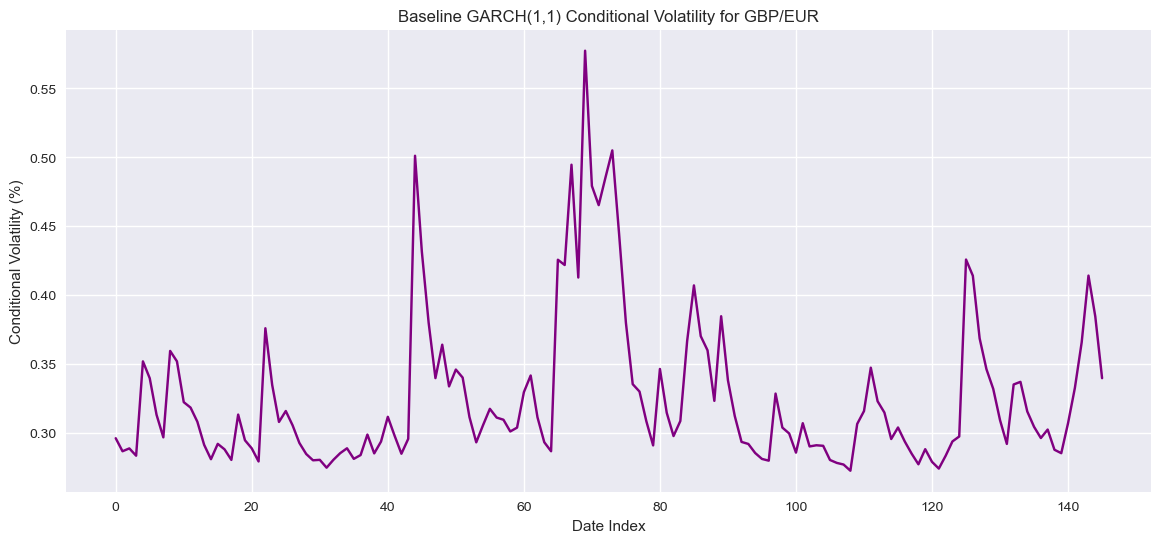

In [42]:
# Conditional variance plot
plt.figure(figsize=(14,6))
plt.plot(res_eur_baseline.conditional_volatility, color='purple')
plt.title('Baseline GARCH(1,1) Conditional Volatility for GBP/EUR')
plt.xlabel('Date Index')
plt.ylabel('Conditional Volatility (%)')
plt.grid(True)
plt.show()


In [44]:
# preparation to run EUR  garch with dummies running in R studio 

In [46]:
gbp_eur.to_csv('gbp_eur_for_r.csv', index=False)

In [47]:
import os
print(os.getcwd())


C:\Users\ADMIN


In [ ]:
## GO TO R STUDIO ## --->>>>>> for garch with dummies "garch_eur"

In [29]:
#back to r studio extra 

In [30]:
# Make a clean copy of your dataframe to avoid SettingWithCopyWarning
gbp_usd_rrr = gbp_usd_r.copy()

# --- Create Pooled Event Dummy ---
# This will mark 1 if any of these events happen, 0 otherwise
gbp_usd_rrr['pooled_event'] = gbp_usd_rrr[['Steel_Al', 'UK_Vehicles', 'Baseline10', 'EPD_Ann', 'EPD_Impl']].max(axis=1)

# --- Create Asymmetry Dummies ---
# Bad News (example: negative announcements, tariffs, etc.)
gbp_usd_rrr['bad_news'] = gbp_usd_rrr[['Steel_Al', 'UK_Vehicles']].max(axis=1)

# Good News (example: positive announcements)
gbp_usd_rrr['good_news'] = gbp_usd_rrr[['Baseline10', 'EPD_Ann', 'EPD_Impl']].max(axis=1)

# --- Scale Log Returns for numerical stability in GARCH ---
gbp_usd_rrr['Log_Return_scaled'] = gbp_usd_rrr['Log_Return'] * 100

# Optional: preview
print(gbp_usd_rrr.head())


        Date  Log_Return  Steel_Al  UK_Vehicles  Baseline10  EPD_Ann  \
0 2025-01-03    0.002341         0            0           0        0   
1 2025-01-06    0.008349         0            0           0        0   
2 2025-01-07   -0.000800         0            0           0        0   
3 2025-01-08   -0.012561         0            0           0        0   
4 2025-01-09   -0.003165         0            0           0        0   

   EPD_Impl  BoE  FOMC  pooled_event  bad_news  good_news  Log_Return_scaled  
0         0    0     0             0         0          0           0.234069  
1         0    0     0             0         0          0           0.834944  
2         0    0     0             0         0          0          -0.079981  
3         0    0     0             0         0          0          -1.256055  
4         0    0     0             0         0          0          -0.316494  


In [31]:
'gbp_usd_rrr' in globals()



True

In [32]:
gbp_usd_rrr.head()


,Date,Log_Return,Steel_Al,UK_Vehicles,Baseline10,EPD_Ann,EPD_Impl,BoE,FOMC,pooled_event,bad_news,good_news,Log_Return_scaled
0,2025-01-03,0.002341,0,0,0,0,0,0,0,0,0,0,0.234069
1,2025-01-06,0.008349,0,0,0,0,0,0,0,0,0,0,0.834944
2,2025-01-07,-0.000800,0,0,0,0,0,0,0,0,0,0,-0.079981
3,2025-01-08,-0.012561,0,0,0,0,0,0,0,0,0,0,-1.256055
4,2025-01-09,-0.003165,0,0,0,0,0,0,0,0,0,0,-0.316494


In [33]:
# Save DataFrame to Excel
gbp_usd_rrr.to_excel("C:/Users/ADMIN/Documents/gbp_usd_rrr.xlsx", index=False)


In [34]:
# Make a clean copy to avoid SettingWithCopyWarning
gbp_eur_rrr = gbp_eur.copy()

# Create pooled_event dummy just like GBP/USD
gbp_eur_rrr['pooled_event'] = gbp_eur_rrr[['Steel_Al','UK_Vehicles','Baseline10','EPD_Ann','EPD_Impl']].max(axis=1)

# Create asymmetry dummies (bad_news, good_news)
gbp_eur_rrr['bad_news'] = gbp_eur_rrr[['Steel_Al','UK_Vehicles','EPD_Ann','EPD_Impl']].max(axis=1)
gbp_eur_rrr['good_news'] = gbp_eur_rrr['Baseline10']  # or whatever is appropriate

# Scale log returns for GARCH
gbp_eur_rrr['Log_Return_scaled'] = gbp_eur_rrr['Log_Return'] * 100


In [35]:
gbp_eur_rrr.to_excel(r"C:\Users\ADMIN\Documents\gbp_eur_rrr.xlsx", index=False)
